In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msn

About this dataset

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

caa: number of major vessels (0-3)

cp : Chest Pain type chest pain type
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved 

target : 
- 0= less chance of heart attack

- 1= more chance of heart attack

Oldpeak: oldpeak = ST [Numeric value measured in depression]

thall: Thalium Stress Test result

**What are cardiovascular diseases?**

Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels. They include:

    -coronary heart disease – a disease of the blood vessels supplying the heart muscle;
    -cerebrovascular disease – a disease of the blood vessels supplying the brain;
    -peripheral arterial disease – a disease of blood vessels supplying the arms and legs;
    -rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria;
    -congenital heart disease – birth defects that affect the normal development and functioning of the heart caused by malformations of the heart -structure from birth; and
    -deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.

Heart attacks and strokes are usually acute events and are mainly caused by a blockage that prevents blood from flowing to the heart or brain. The most common reason for this is a build-up of fatty deposits on the inner walls of the blood vessels that supply the heart or brain. Strokes can be caused by bleeding from a blood vessel in the brain or from blood clots.

source: https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)

In [2]:
df = pd.read_csv('./heart.csv')
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.rename(columns= {"trtbps": "blood_pressure","chol": "cholesterol","thalachh": "maximun_heart_rate",
                    "exng": "exersice_induced_angina", "fbs": "fating_blood_sugar"}, inplace=True)

In [7]:
df.isna().sum()

age                        0
sex                        0
cp                         0
blood_pressure             0
cholesterol                0
fating_blood_sugar         0
restecg                    0
maximun_heart_rate         0
exersice_induced_angina    0
oldpeak                    0
slp                        0
caa                        0
thall                      0
output                     0
dtype: int64

In [8]:
dict = {}
for columns in list(df.columns):
    dict[columns]= df[columns].value_counts().shape[0]
    
pd.DataFrame(dict,index=["unique count"]).T


,unique count
age,41
sex,2
cp,4
blood_pressure,49
cholesterol,152
fating_blood_sugar,2
restecg,3
maximun_heart_rate,91
exersice_induced_angina,2
oldpeak,40


In [9]:
df.describe(exclude= 'category').T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fating_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
maximun_heart_rate,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exersice_induced_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## **Exploratory Data Analysis (EDA)**

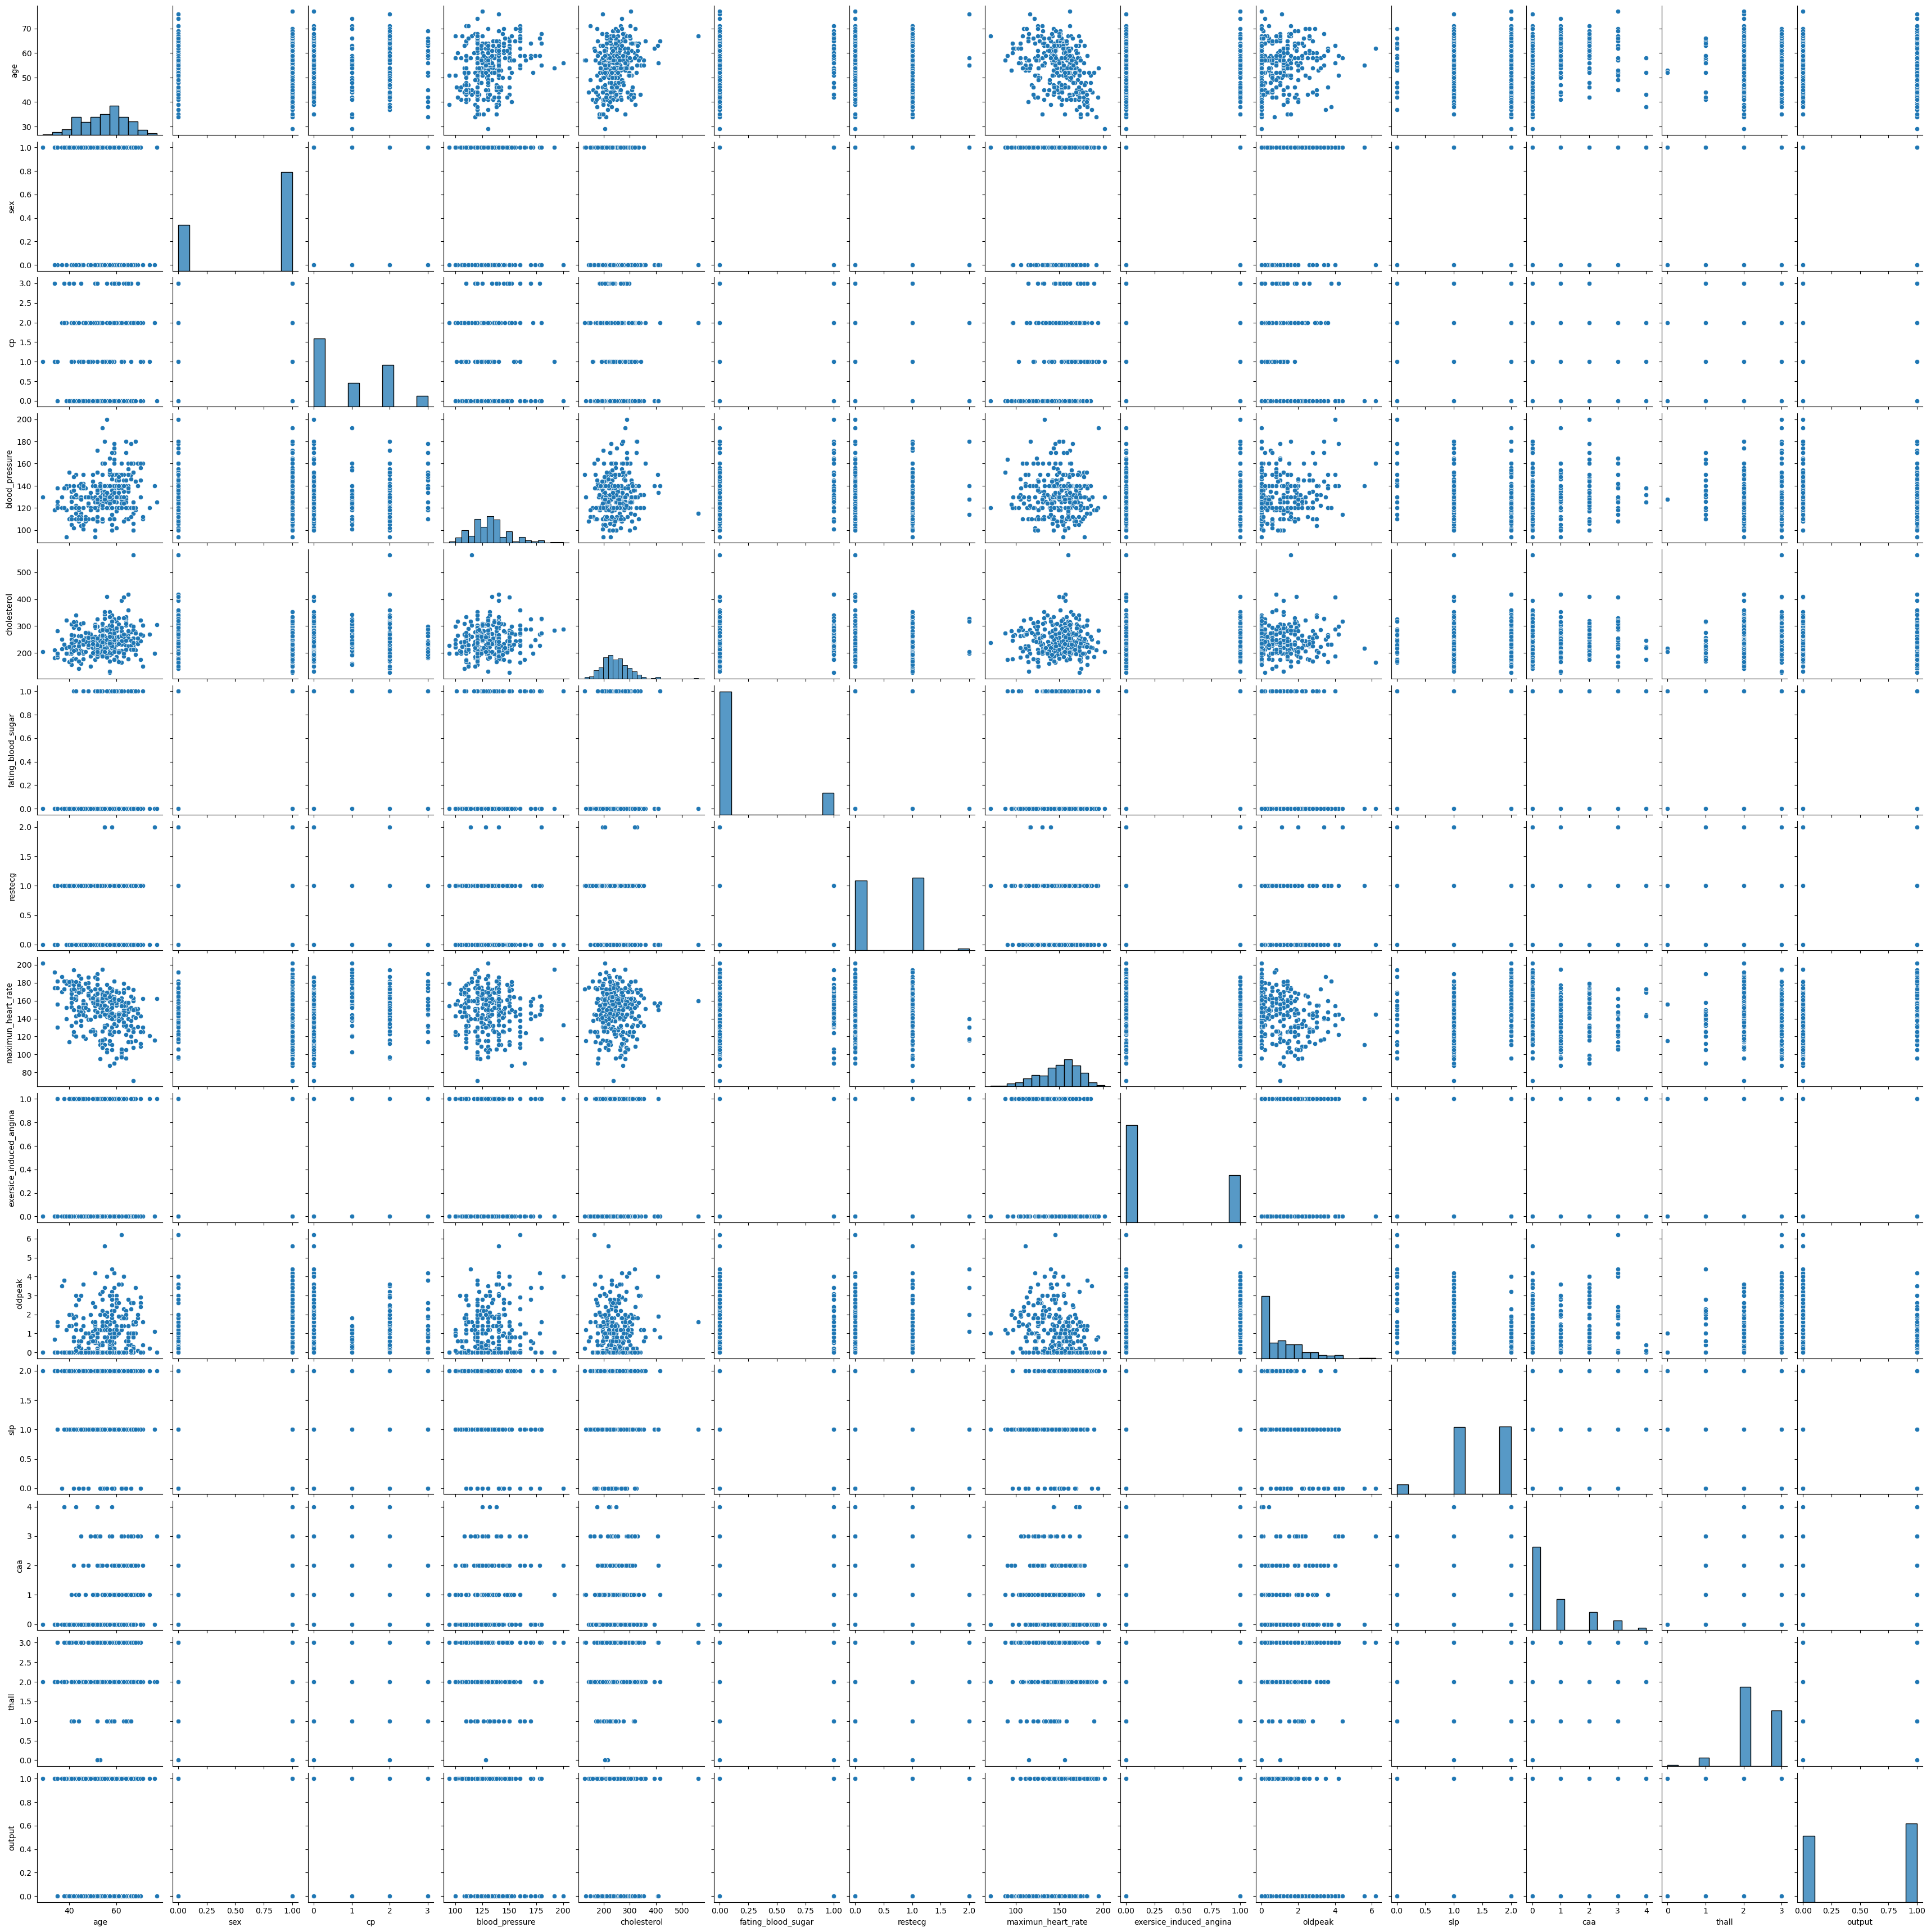

In [10]:
sns.pairplot(df)

#### This is impossible to read. Doing more research on the data set I found the columns that are supposed to be numerical and categorical columns so I will separate them for better analysis.

In [11]:
categorical_cols = ['sex','exersice_induced_angina','caa','cp','fating_blood_sugar','restecg','slp','thall']
continuos_cols = ["age","blood_pressure","cholesterol","maximun_heart_rate","oldpeak", "output"]


In [12]:
df[continuos_cols]

,age,blood_pressure,cholesterol,maximun_heart_rate,oldpeak,output
0,63,145,233,150,2.3,1
1,37,130,250,187,3.5,1
2,41,130,204,172,1.4,1
3,56,120,236,178,0.8,1
4,57,120,354,163,0.6,1
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,0
301,57,130,131,115,1.2,0


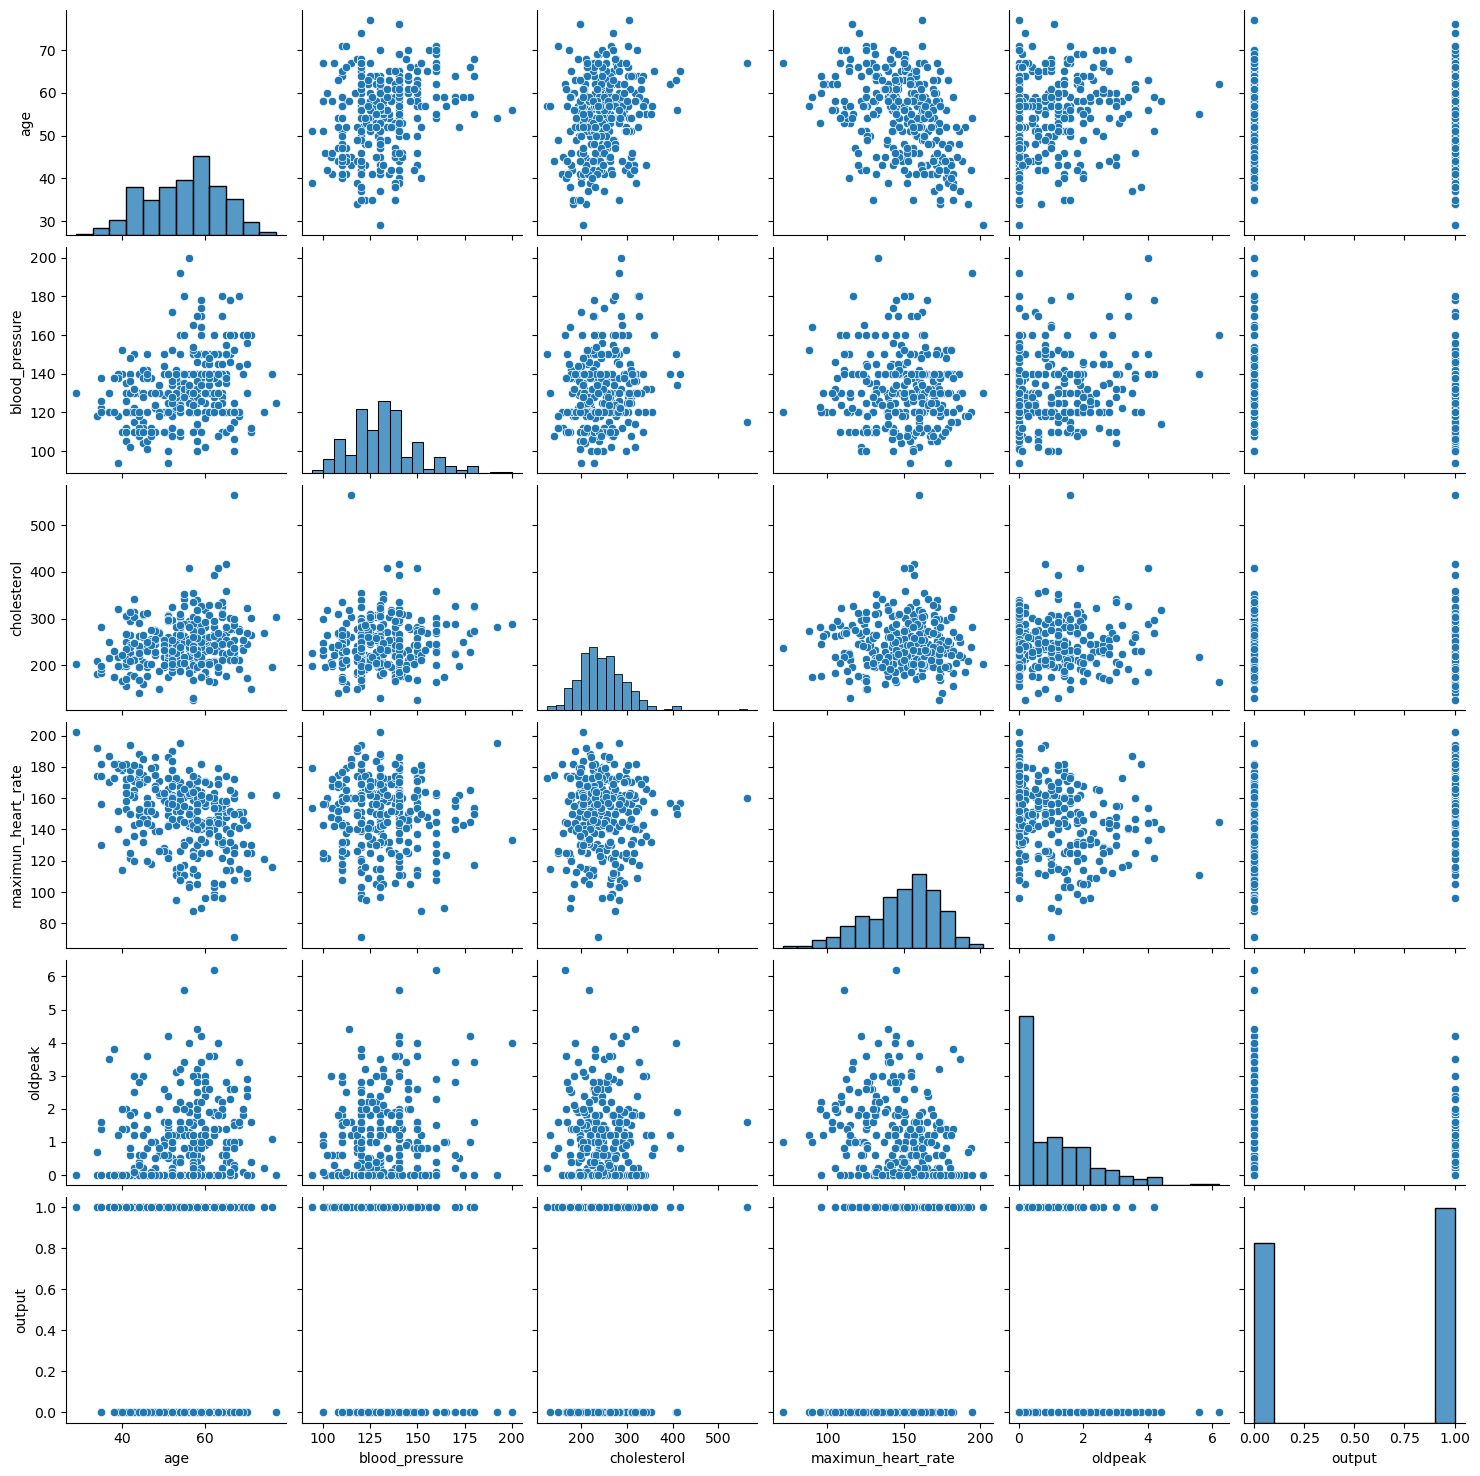

In [13]:
sns.pairplot(df[continuos_cols])

<Axes: >

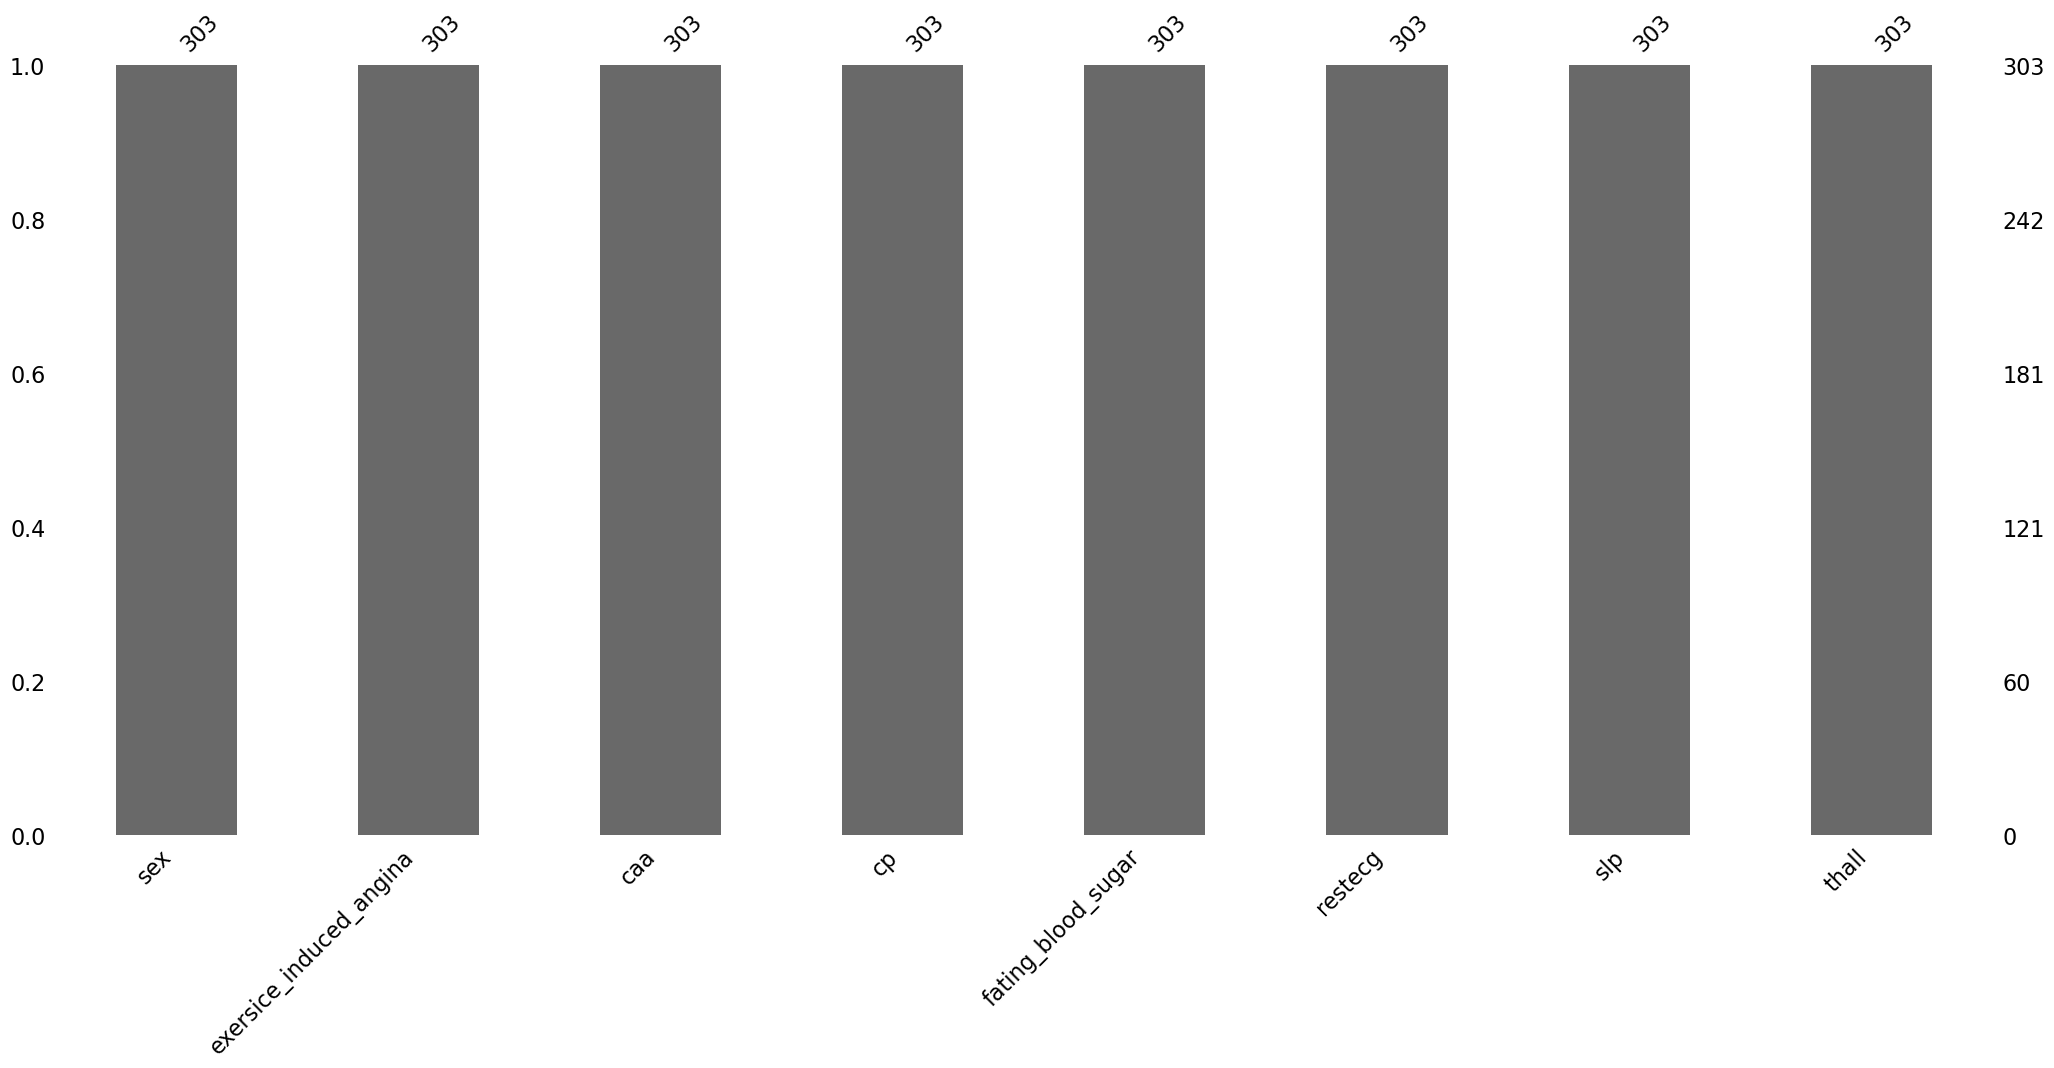

In [14]:
msn.bar(df[categorical_cols])

<Axes: >

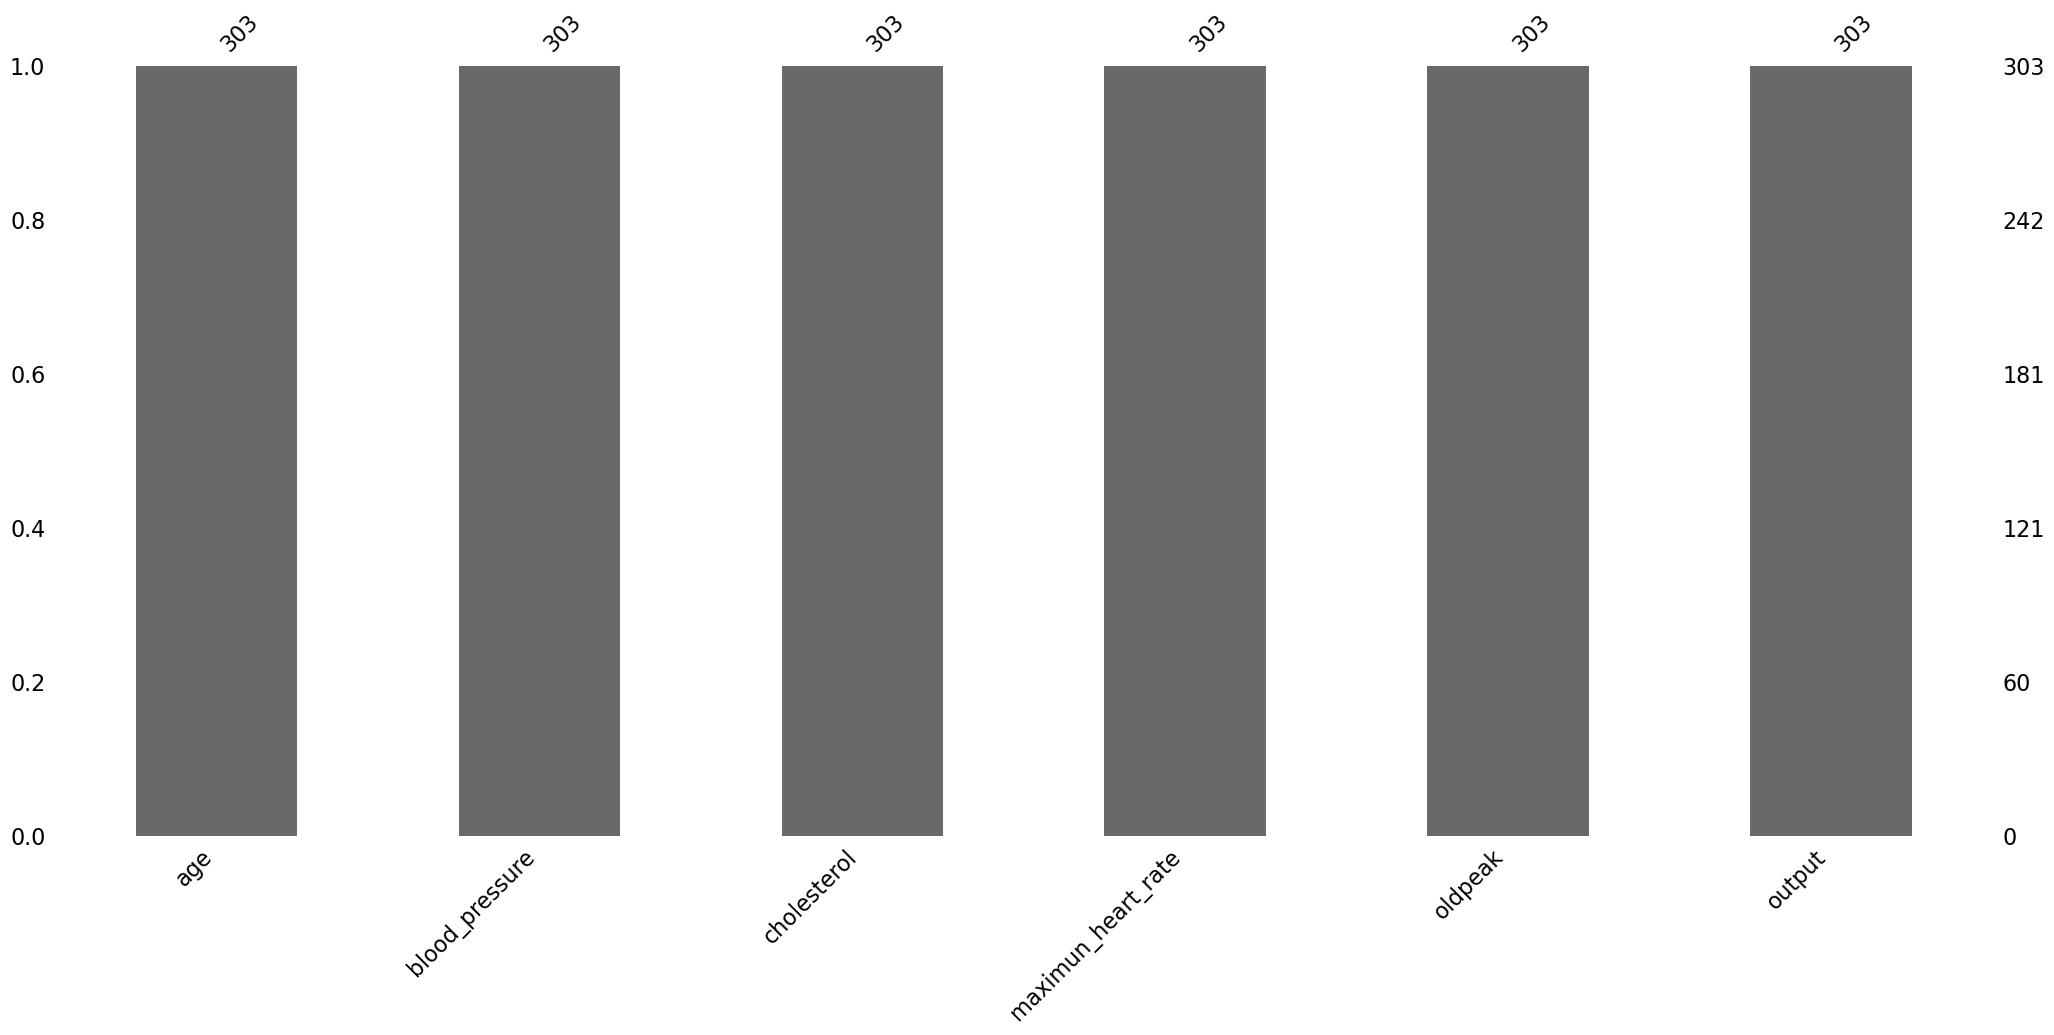

In [15]:
msn.bar(df[continuos_cols])

<Axes: >

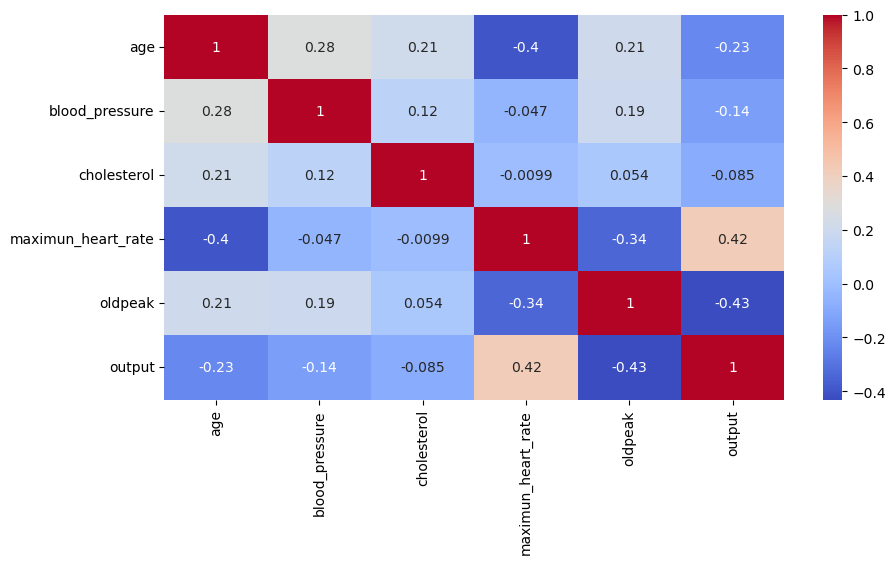

In [16]:
fig = plt.subplots(figsize=(10, 5))
sns.heatmap(df[continuos_cols].corr(), annot=True, cmap='coolwarm')

### Let's see distributions

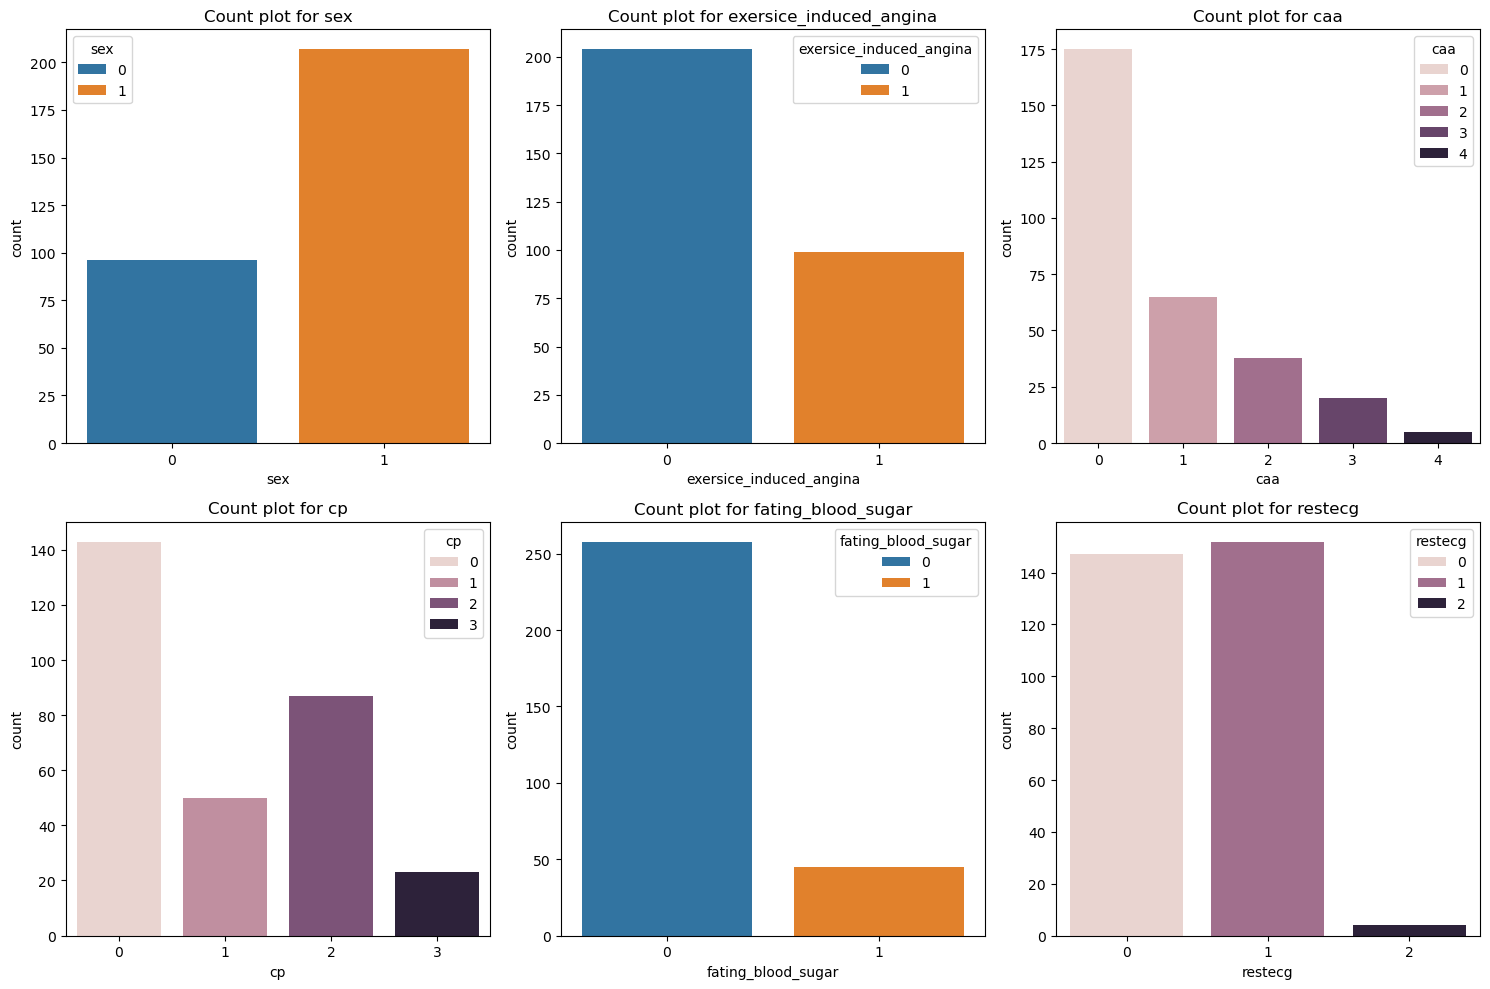

In [17]:
f, axs = plt.subplots(2, 3, figsize=(15,10))
for ax, col in zip(axs.flatten(), categorical_cols):
  sns.countplot(df[categorical_cols], x = col, hue= col, ax=ax)
  ax.set_title(f'Count plot for {col}')

plt.tight_layout()
plt.show()

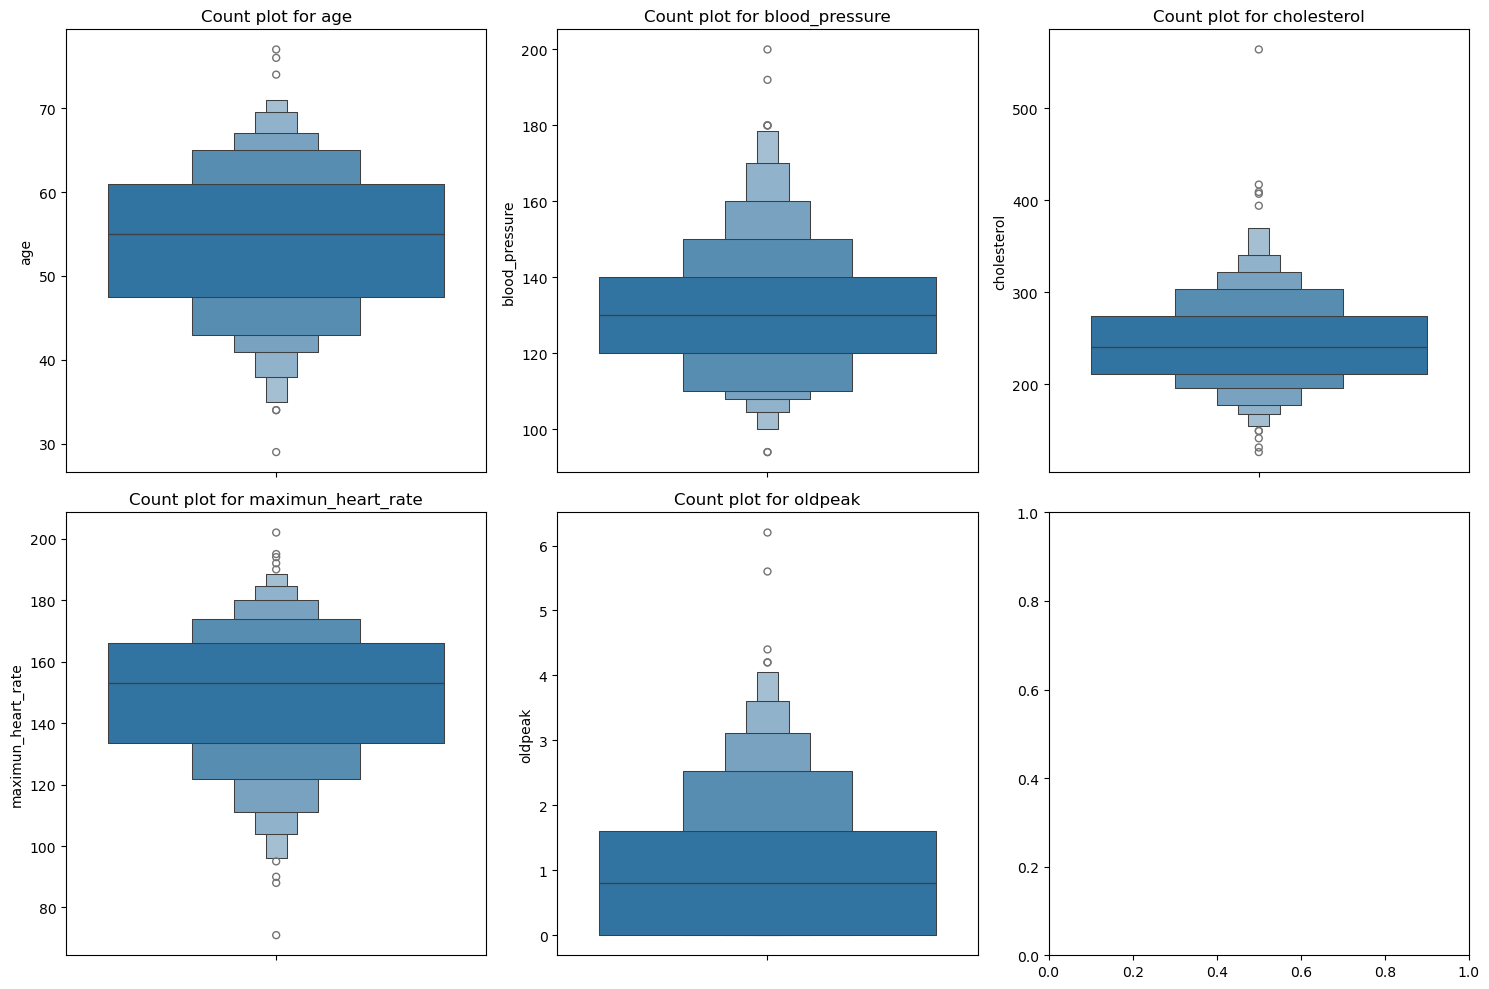

In [18]:
f, axs = plt.subplots(2, 3, figsize=(15,10))
for ax, col in zip(axs.flatten(), continuos_cols[:5]):
  sns.boxenplot(df[continuos_cols], y = col,  ax=ax)
  ax.set_title(f'Count plot for {col}')

plt.tight_layout()
plt.show()

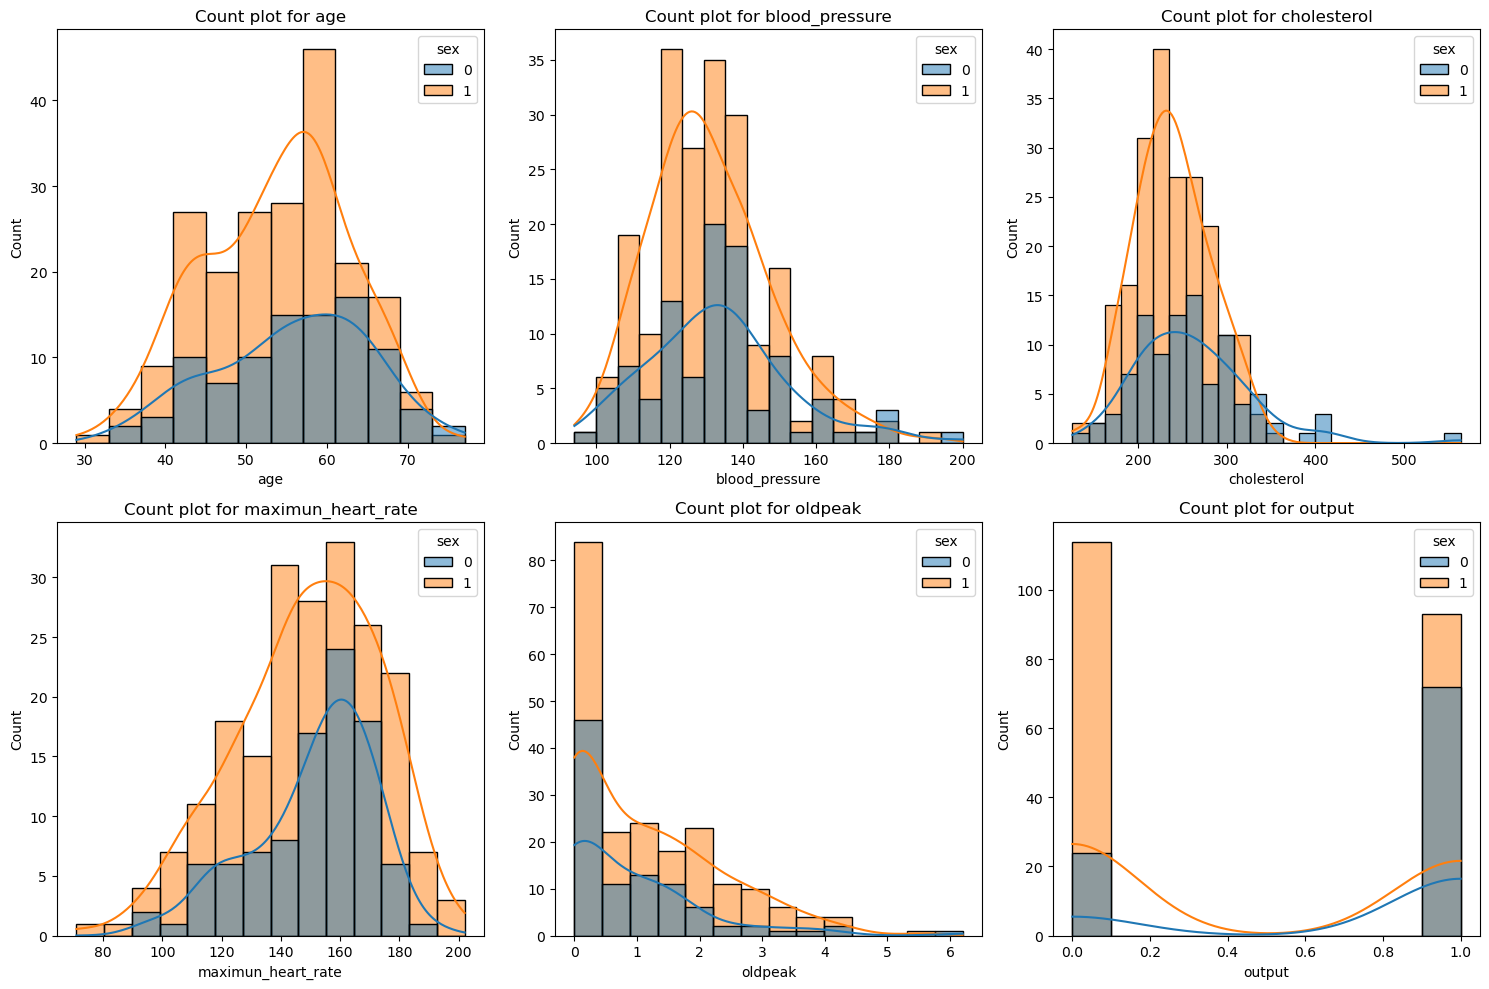

In [19]:
f, axs = plt.subplots(2, 3, figsize=(15,10))
for ax, col in zip(axs.flatten(), continuos_cols):
  sns.histplot(df, x = col, kde=True, ax=ax, hue='sex')
  ax.set_title(f'Count plot for {col}')

plt.tight_layout()
plt.show()

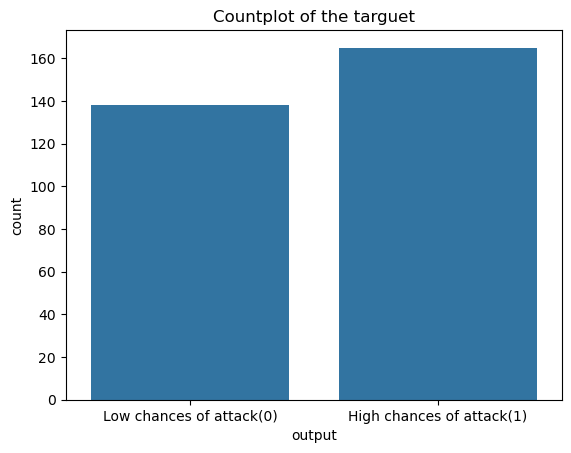

In [20]:
sns.countplot( data=df, x = 'output')
plt.title('Countplot of the targuet')
plt.xticks([0, 1],["Low chances of attack(0)","High chances of attack(1)"])
plt.show()

### Scaling

In [21]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
df_model = df
con_cols = ['age','blood_pressure','cholesterol','maximun_heart_rate','oldpeak']
X = df_model.drop(['output'], axis=1)
y =df_model['output'].values.ravel()

scaler = RobustScaler()
X[con_cols] = scaler.fit_transform(X[con_cols])


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

pipeline_log = Pipeline([
    ('log_classifier', LogisticRegression())
])

pipeline_log.fit(X_train, y_train)


Pipeline(steps=[('log_classifier', LogisticRegression())])

In [25]:
score_log = cross_val_score(pipeline_log, X_train, y_train, cv=5)

print(f'LogisticRegression : {score_log.mean()}')

LogisticRegression : 0.8097789115646259


In [27]:
# calculating the probabilities
y_pred_proba = pipeline_log.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8524590163934426


In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  4],
       [ 5, 27]], dtype=int64)

Text(0.5, 137.22222222222217, 'Predicted label')

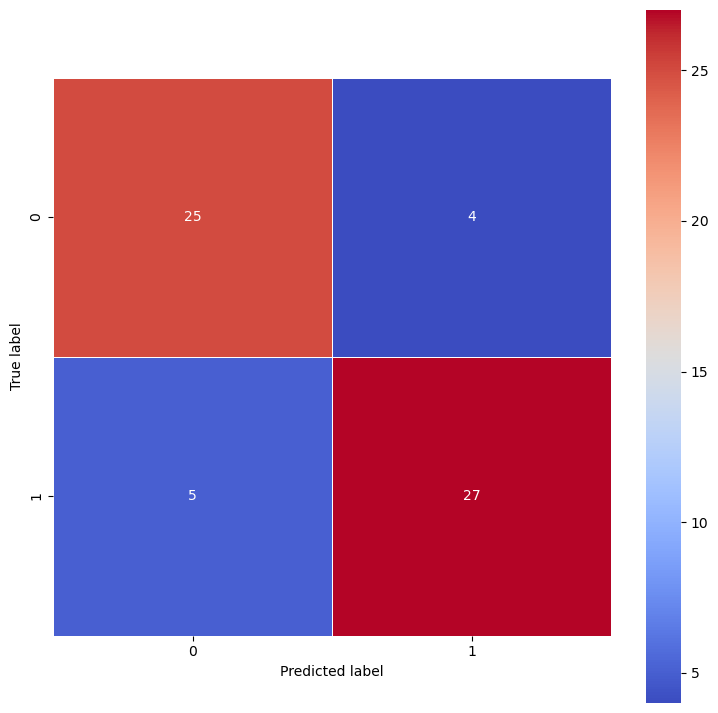

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square=True, cmap='coolwarm')
plt.ylabel('True label')
plt.xlabel('Predicted label')

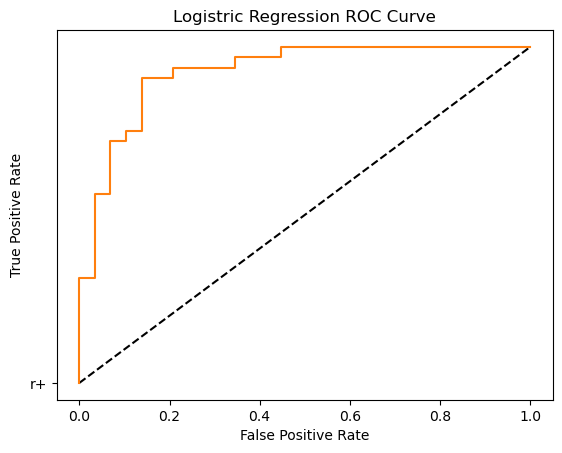

In [28]:
# calculating the probabilities
y_pred_prob = pipeline_log.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()